## Ultimate Challenge Part 1

Tamara Monge

In [1]:
# Standard libraries
import pandas as pd
import json
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# Statistics
from statsmodels.tsa.seasonal import seasonal_decompose

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline 

/Users/Tami/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read in the json file as a DataFrame
df = pd.read_json('logins.json')
df.head()
df.tail()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [4]:
# Check for missing values
df.isnull().sum()

login_time    0
dtype: int64

In [5]:
# Get a sense for the range of the data
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


- 93142 login timestamps
- 92265 unique login timestamps
- Most frequen (3 occurences) login timestamp was 1970-04-04 01:17:40

In [6]:
df.max()
df.min()

login_time   1970-04-13 18:57:38
dtype: datetime64[ns]

login_time   1970-01-01 20:12:16
dtype: datetime64[ns]

- Data quality issue: dates cover 3.5 months, but the year seems incorrect, it is reported as the unix-base year of 1970. 

In [7]:
# Turn login_time into datetime object and rename it
df['login'] = pd.to_datetime(df['login_time'])

# Set datetime index
df.set_index('login', inplace=True)

# Group by 15-minute intervals
df = df.resample('15min', label='left').count()

# Rename column of counts
df.columns = ['count']

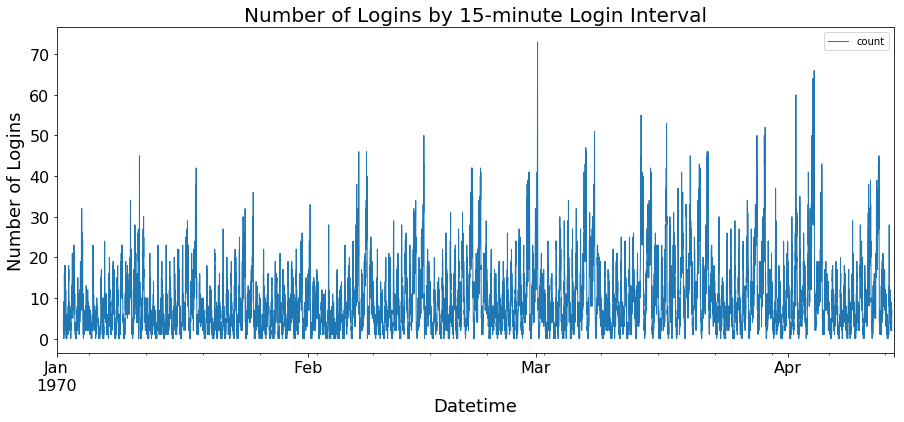

In [8]:
# Plot time series
df.plot(figsize =(15,6), fontsize=16, linewidth=1)
plt.xlabel('Datetime', fontsize=18)
plt.xlim(['1970-01', '1970-04-14'])
plt.ylabel('Number of Logins', fontsize=18)
plt.title('Number of Logins by 15-minute Login Interval', fontsize=20);

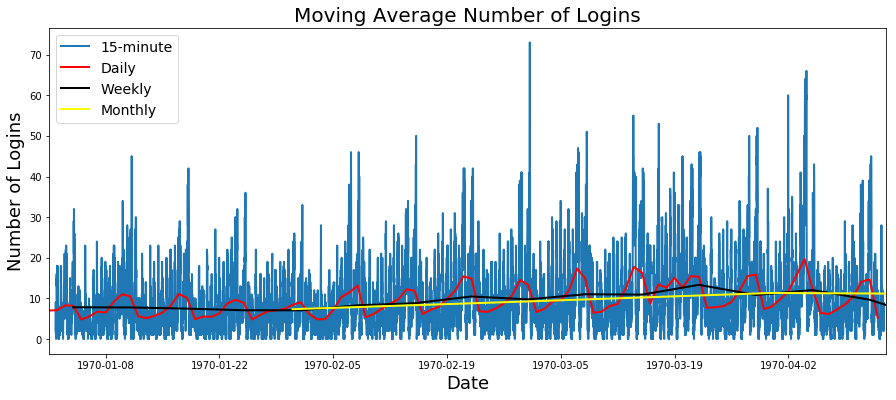

In [9]:
# Look at daily cycle moving average
plt.figure(figsize=(15, 6))
plt.plot(df, linewidth=2)
plt.plot(df.groupby(pd.Grouper(freq='D')).mean(), linewidth=2, color='red')
plt.plot(df.groupby(pd.Grouper(freq='W')).mean(), linewidth=2, color='black')
plt.plot(df.groupby(pd.Grouper(freq='M')).mean(), linewidth=2, color='yellow')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Logins', fontsize=18)
plt.xlim(['1970-01', '1970-04-14'])
plt.title('Moving Average Number of Logins', fontsize=20);
plt.legend(['15-minute', 'Daily', 'Weekly', 'Monthly'], fontsize=14);

plt.savefig('moving_average_n_logins.png');

- We see a clear daily cycle to the demand (red curve). 
- Additionally, we see the demand is slowly increasing over time (black and yellow curves).

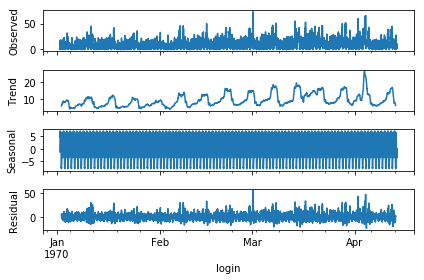

In [10]:
# Look at daily seasonal decomposition 
decomposition = seasonal_decompose(df, model='additive', freq=96) # one day
decomposition.plot();
plt.savefig('daily_decomposition.png');

- Clear diurnal cycling (3rd figure)
- Trend (2nd figure) shows additional cycling at longer intervals.

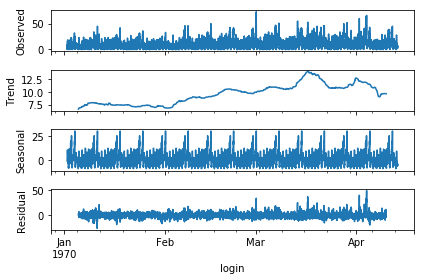

In [11]:
# Look at weekly seasonal decomposition 
decomposition = seasonal_decompose(df, model='additive', freq=672) # one week
decomposition.plot();
plt.savefig('weekly_decomposition.png');

- Clear weekly cycling (3rd figure). 
- Upward trend over time (2nd figure).